# IMPORTING LIBRARIES

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

STEP1: DATA PROCESSING

At first, I'm going to load the data and perform data cleaning steps like handling missing values, removing duplicates, handling outliers, and converting categorical variables to numerical variables.

In [68]:
# loading the dataset to pandas DataFrame
df = pd.read_excel('/content/Bank_loan_data.xlsx','Data')

In [69]:
df.head()

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,M,1,49.0,91107,4,1.6,1,0,Home Owner,0,1,0,0.0,0
1,2,45,M,19,34.0,90089,3,1.5,1,0,Rent,0,1,0,0.0,0
2,3,39,M,15,11.0,94720,1,1.0,1,0,Rent,0,0,0,0.0,0
3,4,35,M,9,100.0,94112,1,2.7,2,0,Rent,0,0,0,0.0,0
4,5,35,M,8,45.0,91330,4,1.0,2,0,Rent,0,0,0,0.0,1


In [70]:
df.describe(include="all")

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,3404,5000.000000,4933.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,3811,5000.0,5000.000000,5000.00000,4960.000000,5000.000000
unique,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3.0,NaN,NaN,NaN,NaN
top,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Home Mortage,0.0,NaN,NaN,NaN,NaN
freq,NaN,NaN,1677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1705,4520.0,NaN,NaN,NaN,NaN
mean,2500.500000,46.008200,NaN,20.104600,72.758159,93152.503000,2.396400,1.937913,1.880600,56.498800,NaN,NaN,0.104400,0.06040,0.596976,0.294000
std,1443.520003,25.444898,NaN,11.467954,45.425519,2121.852197,1.147663,1.747666,0.839812,101.713802,NaN,NaN,0.305809,0.23825,0.490555,0.455637
min,1.000000,0.000000,NaN,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,NaN,NaN,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,NaN,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,NaN,NaN,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,NaN,20.000000,63.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,NaN,NaN,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,NaN,30.000000,95.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,NaN,NaN,0.000000,0.00000,1.000000,1.000000


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Gender              3404 non-null   object 
 3   Experience          5000 non-null   int64  
 4   Income              4933 non-null   float64
 5   ZIP Code            5000 non-null   int64  
 6   Family              5000 non-null   int64  
 7   CCAvg               5000 non-null   float64
 8   Education           5000 non-null   int64  
 9   Mortgage            5000 non-null   int64  
 10  Home Ownership      3811 non-null   object 
 11  Personal Loan       5000 non-null   object 
 12  Securities Account  5000 non-null   int64  
 13  CD Account          5000 non-null   int64  
 14  Online              4960 non-null   float64
 15  CreditCard          5000 non-null   int64  
dtypes: flo

In [72]:
df.shape

(5000, 16)

In [73]:
#Looking for missing values
pd.DataFrame(df.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
ID,0
Age,0
Gender,1596
Experience,0
Income,67
ZIP Code,0
Family,0
CCAvg,0
Education,0
Mortgage,0


# STEP 2: FEATURE ENGINEERING

In [74]:
# Mean imputation for 'Income'
df['Income'].fillna(df['Income'].mean(), inplace=True)

In [75]:
unique_values = df['Gender'].unique()
print(unique_values)

['M' 'F' 'O' nan '#' '-']


In [76]:
# Let's assume '#' and '-' are invalid placeholders and we want to replace them with NaN
df['Gender'] = df['Gender'].replace({'#': np.nan, '-': np.nan})

In [77]:
unique_values = df['Gender'].unique()
print(unique_values)

['M' 'F' 'O' nan]


In [78]:
unique_values = df['Home Ownership'].unique()
print(unique_values)

['Home Owner' 'Rent' 'Home Mortage' nan]


In [79]:
unique_values = df['Online'].unique()
print(unique_values)

[ 0.  1. nan]


In [80]:
# Mode imputation for null values of 'Gender' , 'Home Ownership' and 'Online' columns
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Home Ownership'].fillna(df['Home Ownership'].mode()[0], inplace=True)
df['Online'].fillna(df['Online'].mode()[0], inplace=True)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Gender              5000 non-null   object 
 3   Experience          5000 non-null   int64  
 4   Income              5000 non-null   float64
 5   ZIP Code            5000 non-null   int64  
 6   Family              5000 non-null   int64  
 7   CCAvg               5000 non-null   float64
 8   Education           5000 non-null   int64  
 9   Mortgage            5000 non-null   int64  
 10  Home Ownership      5000 non-null   object 
 11  Personal Loan       5000 non-null   object 
 12  Securities Account  5000 non-null   int64  
 13  CD Account          5000 non-null   int64  
 14  Online              5000 non-null   float64
 15  CreditCard          5000 non-null   int64  
dtypes: flo

In [82]:
unique_values = df['Personal Loan'].unique()
print(unique_values)

[0 1 ' ']


In [83]:
df['Personal Loan'].value_counts()

0    4520
1     479
        1
Name: Personal Loan, dtype: int64

In [84]:
df['Personal Loan'] = df['Personal Loan'].replace(' ', 0)

In [85]:
df['Personal Loan'].value_counts()

0    4521
1     479
Name: Personal Loan, dtype: int64

## STEP 3: EDA

In [34]:
for col in df.columns:
    print(col)

ID
Age
Gender
Experience
Income
ZIP Code
Family
CCAvg
Education
Mortgage
Home Ownership
Personal Loan
Securities Account
CD Account
Online
CreditCard


[Text(0.5, 1.0, 'Box Plot of Age (Before Handling Outliers')]

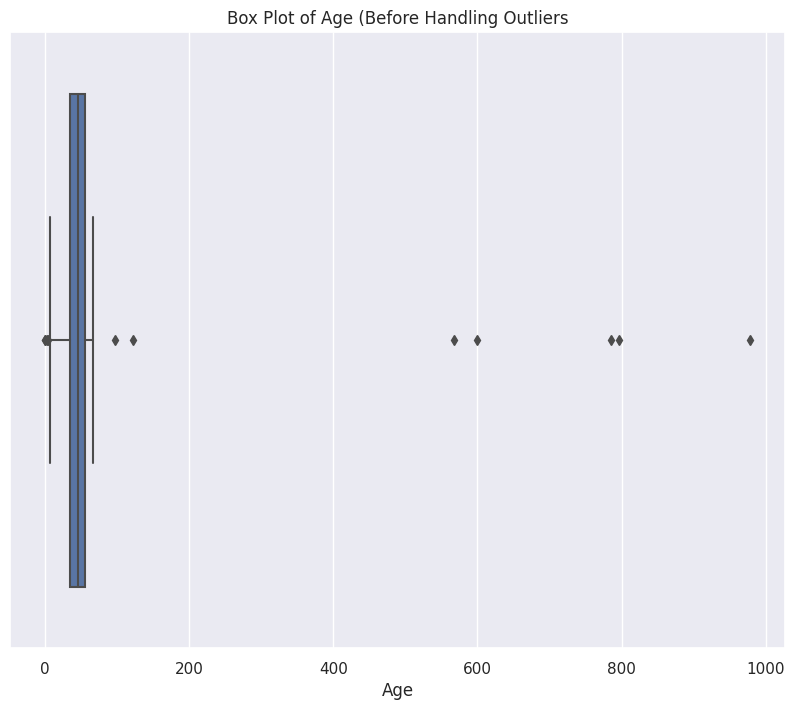

In [87]:
#to find outliers in Age column
sns.set(rc={"figure.figsize":(10, 8)})
sns.boxplot(x=df['Age']).set(title='Box Plot of Age (Before Handling Outliers)')

[Text(0.5, 1.0, 'Box Plot of Age (After Handling Outliers)')]

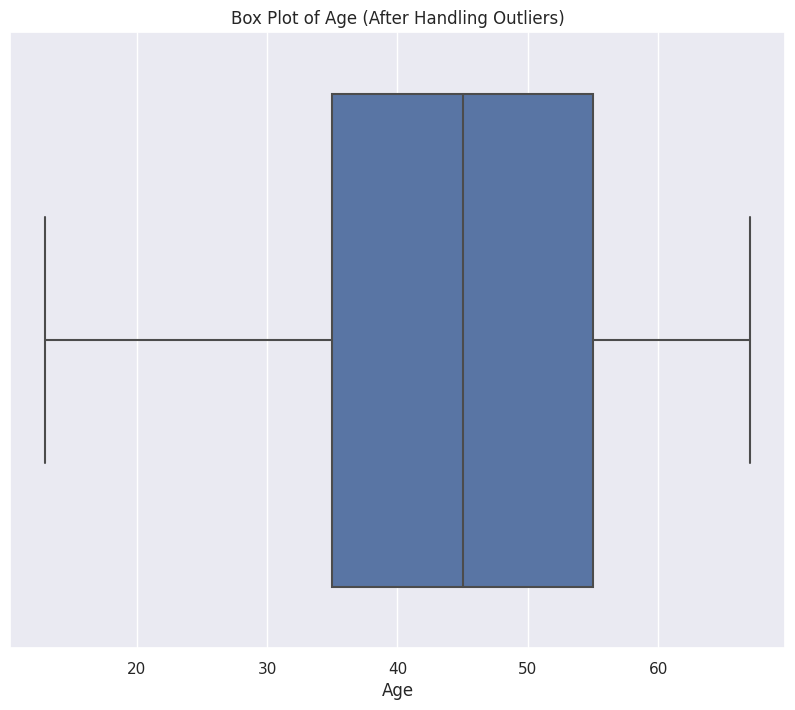

In [89]:
from scipy.stats import zscore


# Identify outliers using the Z-score method
z_scores = zscore(df['Age'])

# Keep data within a threshold of Z-scores (e.g., -3 to 3)
threshold = 3
df = df[(z_scores < threshold) & (z_scores > -threshold)]
sns.boxplot(x=df['Age']).set(title='Box Plot of Age (After Handling Outliers)')


In [92]:
df.shape

(4985, 16)

In [93]:
#Encoding categorical values to numerical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
print(label_encoder.classes_)
df['Home Ownership'] = label_encoder.fit_transform(df['Home Ownership'])
print(label_encoder.classes_)

['F' 'M' 'O']
['Home Mortage' 'Home Owner' 'Rent']


In [94]:
new_df = df.drop('ID', axis=1)

<Axes: >

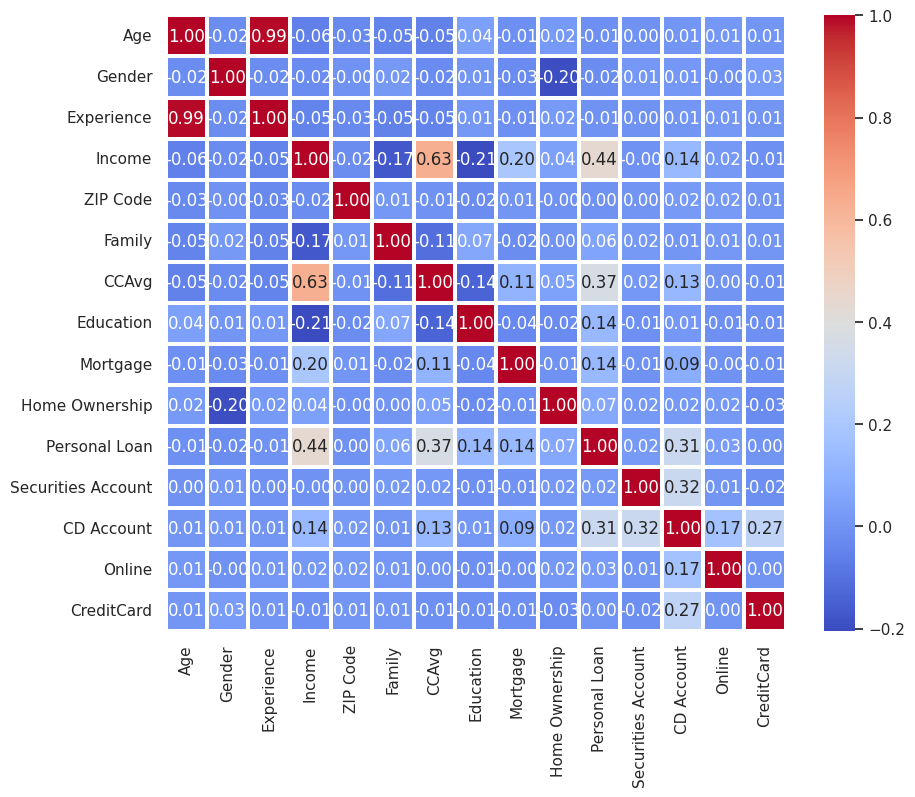

In [95]:
sns.set(rc={"figure.figsize":(10, 8)})
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1.5)

[Text(0.5, 1.0, 'Income vs. Personal Loan')]

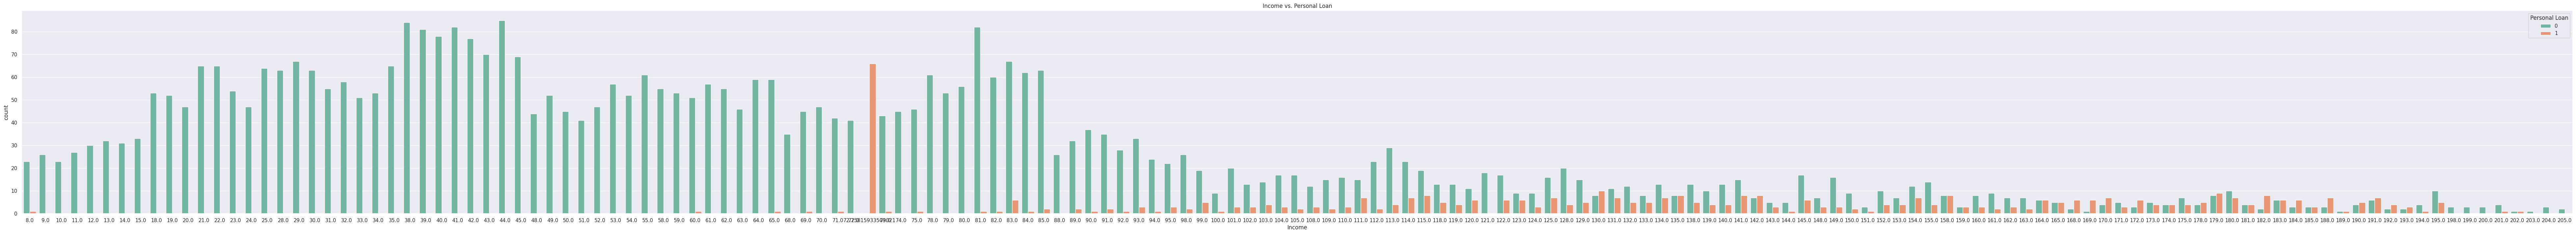

In [147]:
#Visualize relationships between features and the target variable
sns.set(rc={"figure.figsize":(100, 8)})
sns.countplot(data=df,x='Income',hue='Personal Loan',palette='Set2').set(title='Income vs. Personal Loan')

[Text(0.5, 1.0, 'CCAvg vs. Personal Loan')]

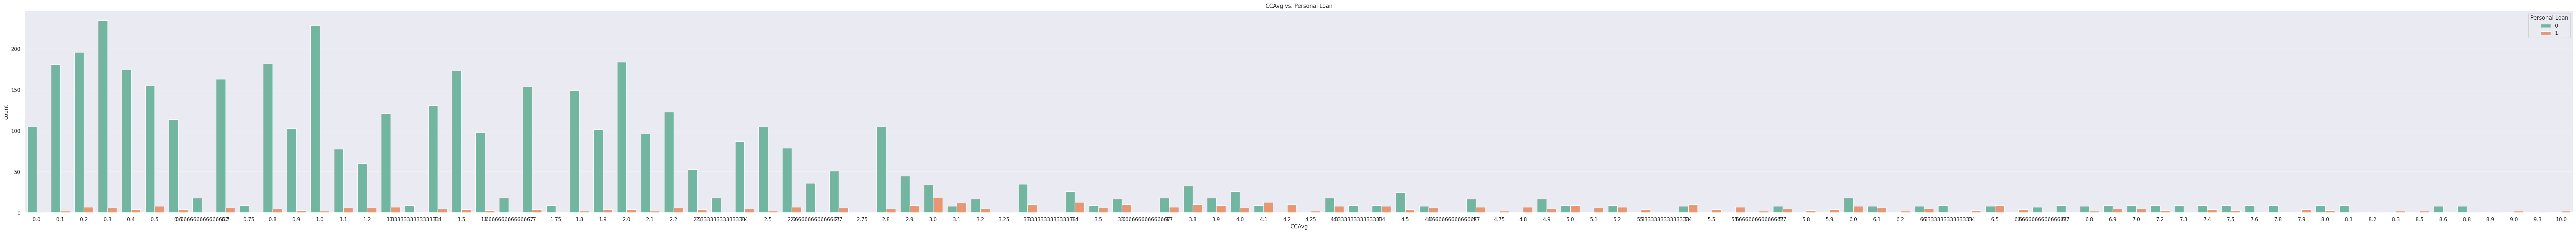

In [148]:
#Visualize relationships between features and the target variable
sns.set(rc={"figure.figsize":(100, 8)})
sns.countplot(data=df,x='CCAvg',hue='Personal Loan',palette='Set2').set(title='CCAvg vs. Personal Loan')

[Text(0.5, 1.0, 'Age vs. Personal Loan')]

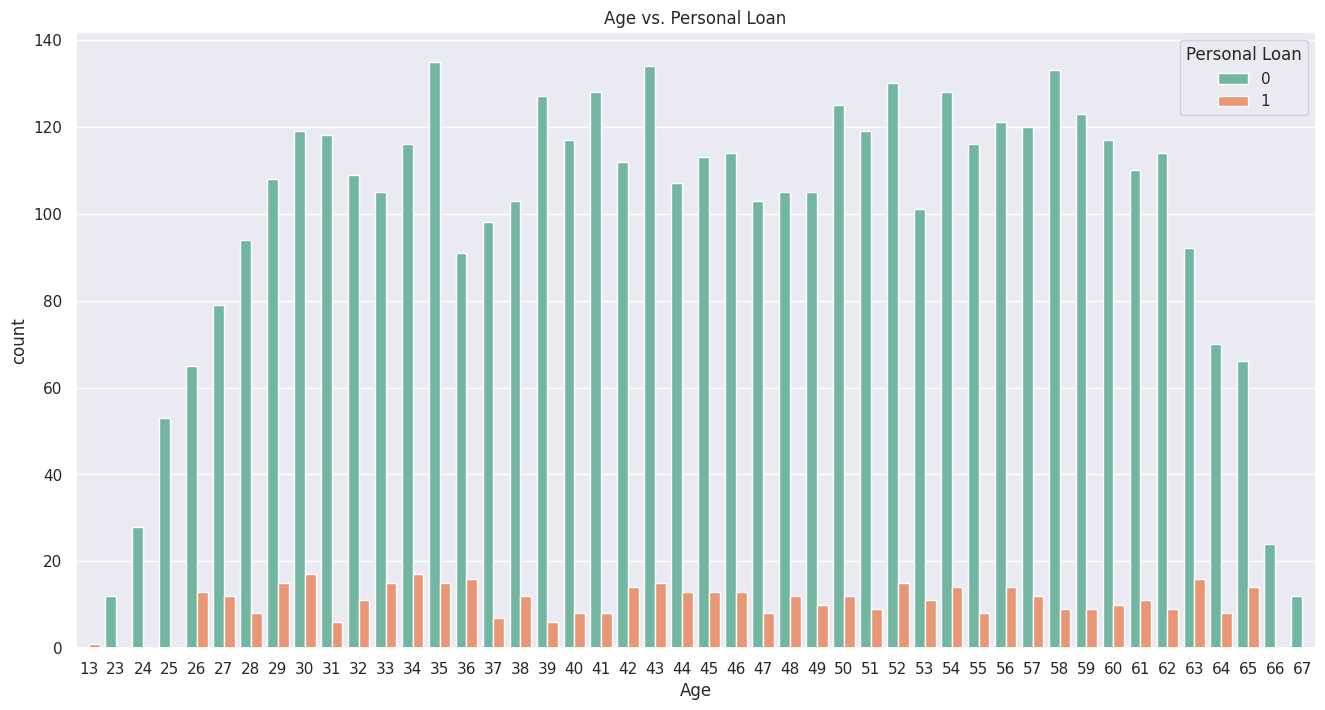

In [110]:
#Visualize relationships between features and the target variable
sns.set(rc={"figure.figsize":(16, 8)})
sns.countplot(data=df,x='Age',hue='Personal Loan',palette='Set2').set(title='Age vs. Personal Loan')

[Text(0.5, 1.0, 'Gender vs. Personal Loan')]

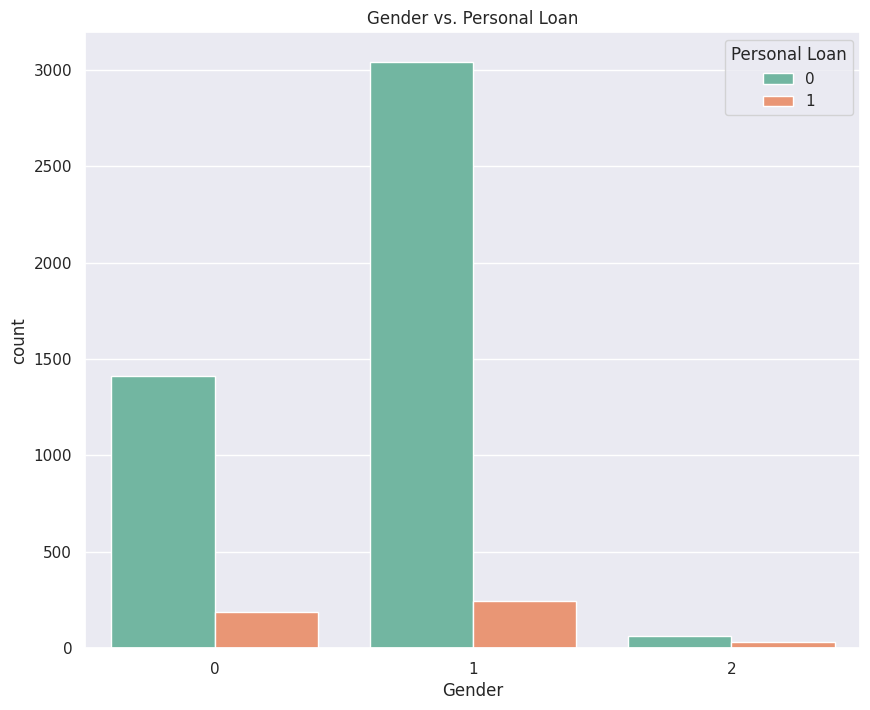

In [111]:
#Visualize relationships between features and the target variable
sns.set(rc={"figure.figsize":(10, 8)})
sns.countplot(data=df,x='Gender',hue='Personal Loan',palette='Set2').set(title='Gender vs. Personal Loan')

[Text(0.5, 1.0, 'Income vs. Personal Loan')]

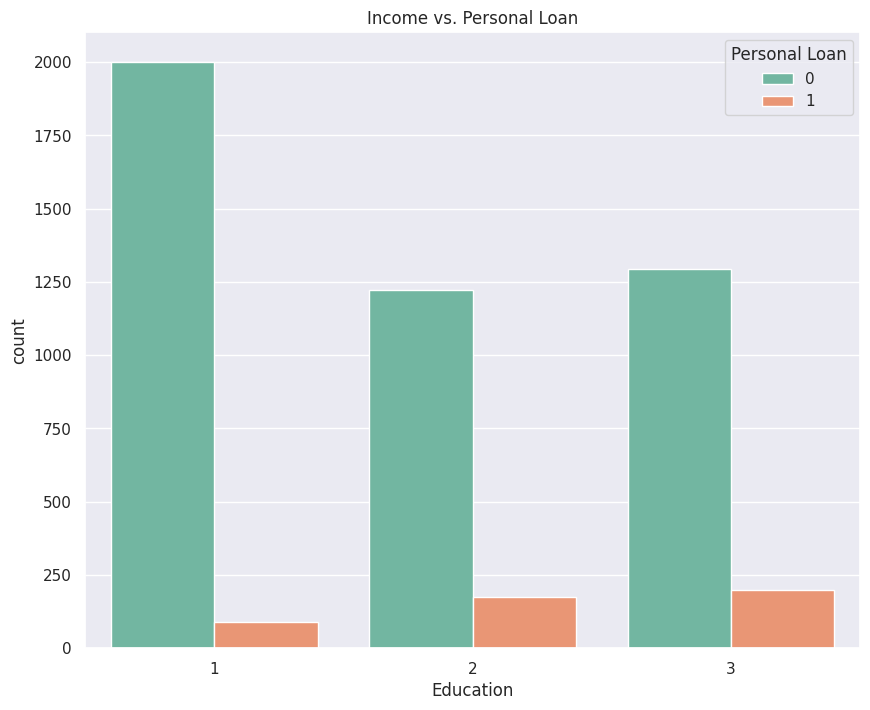

In [102]:
#Visualize relationships between features and the target variable
sns.set(rc={"figure.figsize":(10, 8)})
sns.countplot(data=df,x='Education',hue='Personal Loan',palette='Set2').set(title='Education vs. Personal Loan')

[Text(0.5, 1.0, 'Home Ownership vs. Personal Loan')]

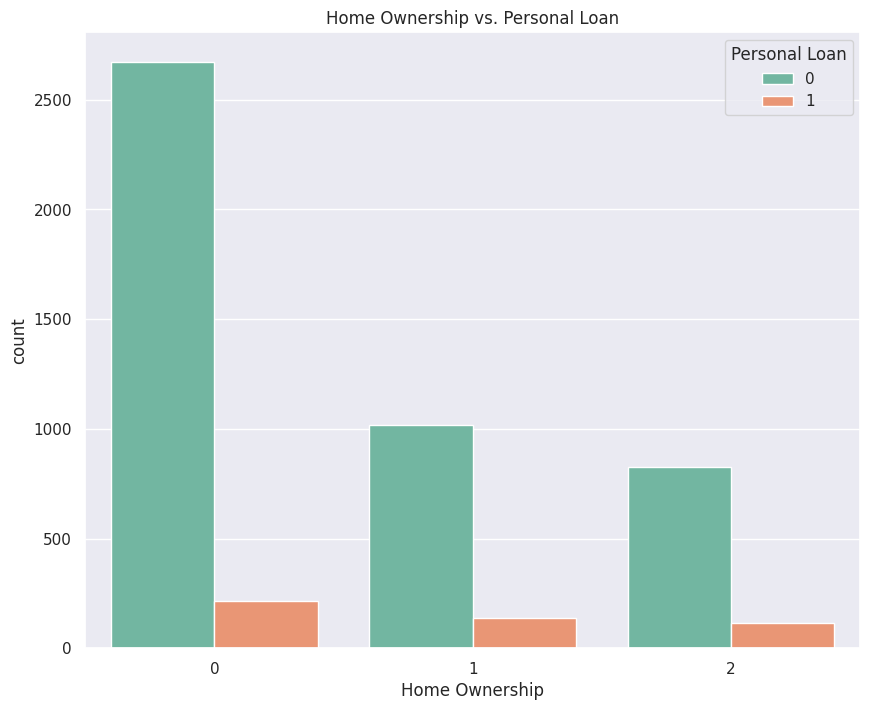

In [104]:
#Visualize relationships between features and the target variable
sns.set(rc={"figure.figsize":(10, 8)})
sns.countplot(data=df,x='Home Ownership',hue='Personal Loan',palette='Set2').set(title='Home Ownership vs. Personal Loan')

[Text(0.5, 1.0, 'Online vs. Personal Loan')]

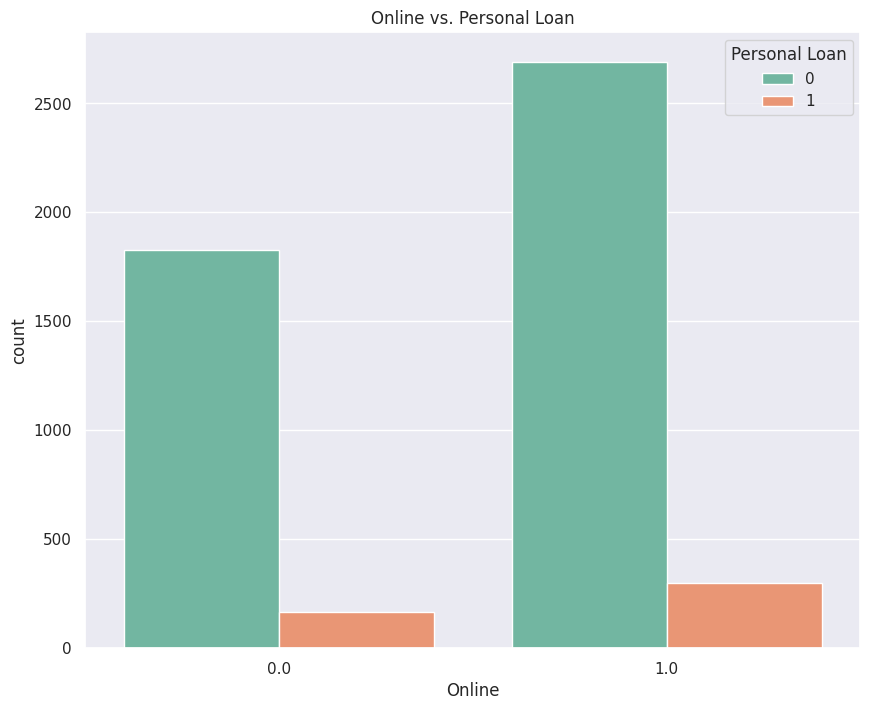

In [152]:
#Visualize relationships between features and the target variable
sns.set(rc={"figure.figsize":(10, 8)})
sns.countplot(data=df,x='Online',hue='Personal Loan',palette='Set2').set(title='Online vs. Personal Loan')

[Text(0.5, 1.0, 'CD Account vs. Personal Loan')]

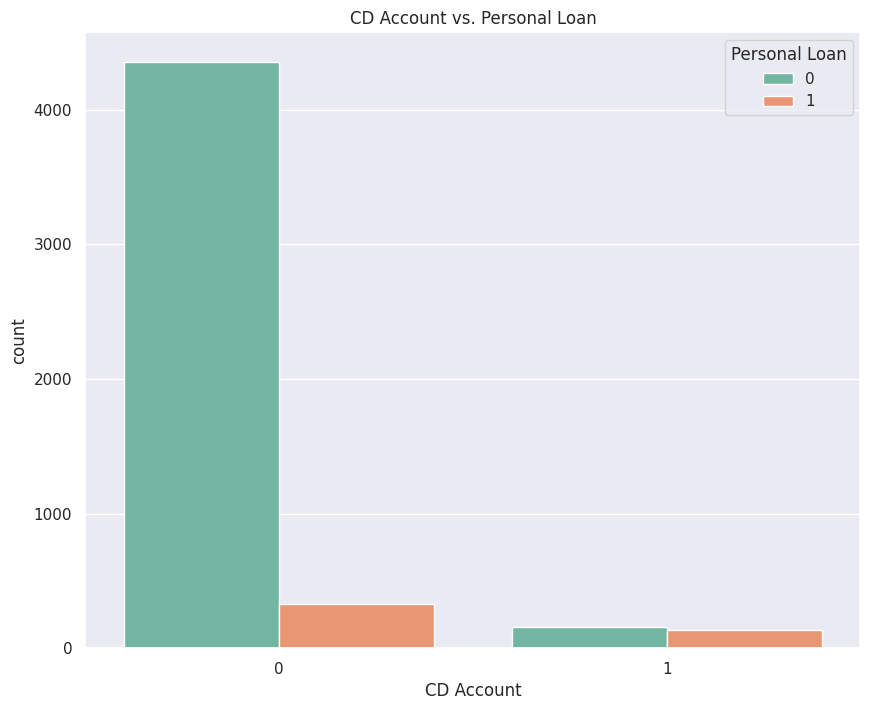

In [151]:
#Visualize relationships between features and the target variable
sns.set(rc={"figure.figsize":(10, 8)})
sns.countplot(data=df,x='CD Account',hue='Personal Loan',palette='Set2').set(title='CD Account vs. Personal Loan')

[Text(0.5, 1.0, 'Securities Account vs. Personal Loan')]

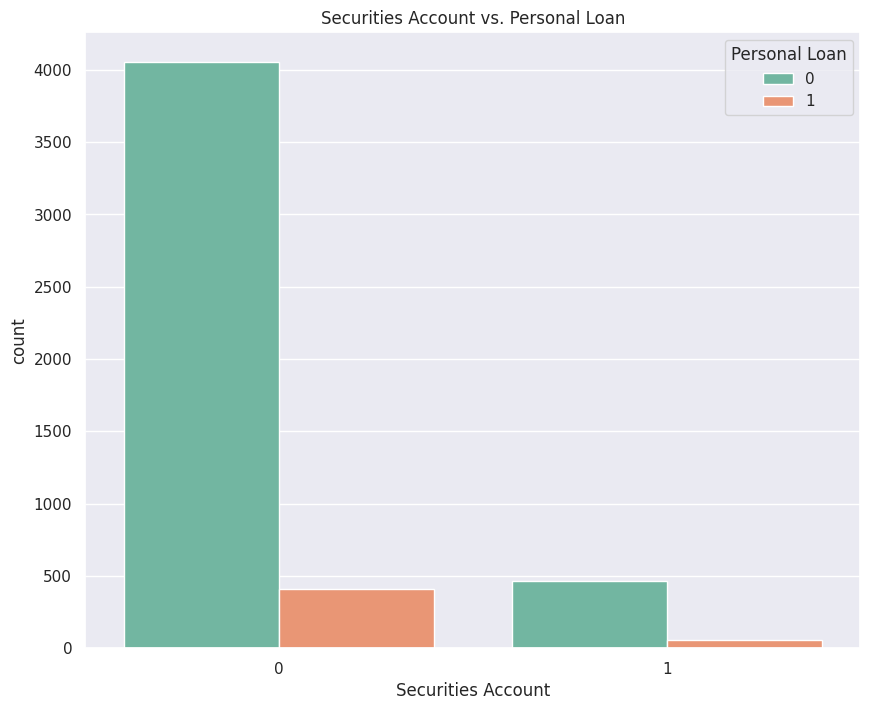

In [150]:
#Visualize relationships between features and the target variable
sns.set(rc={"figure.figsize":(10, 8)})
sns.countplot(data=df,x='Securities Account',hue='Personal Loan',palette='Set2').set(title='Securities Account vs. Personal Loan')

## STEP4: CREATING AND OBSERVING THE PERFORMACE OF MODELS

In [113]:
# Separating features (X) and target variable (y)
X = df.drop(columns=['ID', 'Personal Loan', 'ZIP Code'])
y = df['Personal Loan']

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [129]:
X_train.shape, X_test.shape

((3988, 13), (997, 13))

## SVM MODEL

In [123]:
# Create and train the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [130]:
# Predict using the SVM model
y_pred = svm_model.predict(X_test)

In [131]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 94.28%
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       902
           1       0.85      0.48      0.62        95

    accuracy                           0.94       997
   macro avg       0.90      0.74      0.79       997
weighted avg       0.94      0.94      0.94       997

Confusion Matrix:
[[894   8]
 [ 49  46]]


In [137]:
import pickle
# Save the model to a file
with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)

# RANDOM FOREST CLASSIFIER MODEL

In [139]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions using the Random Forest model
y_pred_rf = random_forest_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy: {:.2f}%".format(accuracy_rf * 100))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 98.29%
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       902
           1       0.98      0.84      0.90        95

    accuracy                           0.98       997
   macro avg       0.98      0.92      0.95       997
weighted avg       0.98      0.98      0.98       997

Random Forest Confusion Matrix:
[[900   2]
 [ 15  80]]


In [141]:
import pickle
# Save the model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(random_forest_model, file)

## GRADIENT BOOSTING CLASSIFIER

In [140]:
from sklearn.ensemble import GradientBoostingClassifier

# Create and train the Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boosting_model.fit(X_train, y_train)

# Make predictions using the Gradient Boosting model
y_pred_gb = gradient_boosting_model.predict(X_test)

# Evaluate the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy: {:.2f}%".format(accuracy_gb * 100))
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Gradient Boosting Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

Gradient Boosting Accuracy: 98.60%
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       902
           1       0.96      0.89      0.92        95

    accuracy                           0.99       997
   macro avg       0.97      0.95      0.96       997
weighted avg       0.99      0.99      0.99       997

Gradient Boosting Confusion Matrix:
[[898   4]
 [ 10  85]]


In [142]:
import pickle
# Save the model to a file
with open('gradient_boosting_model.pkl', 'wb') as file:
    pickle.dump(gradient_boosting_model, file)